### EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timedelta
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
#importing over and undersampling algorithms from imblearn (you will have to manually install it in your envoirenment with pip install imblearn) 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

In [36]:
data = pd.read_csv('./data/training.csv')


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [4]:
data.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [5]:
#sns.pairplot(data)

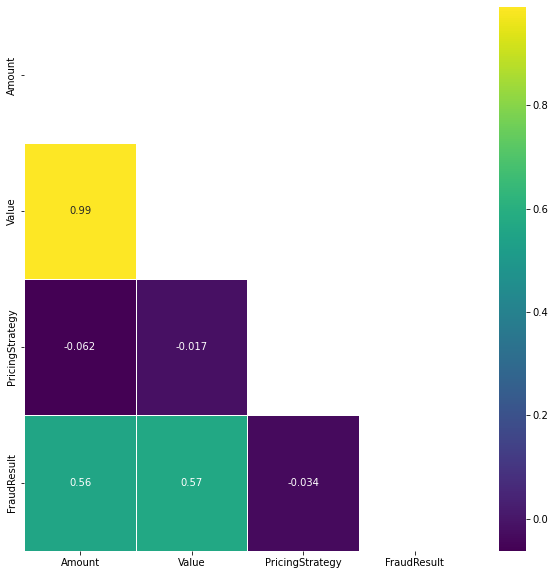

In [6]:
# plotting the correlation matrix on the given data to see how each column correlates to another
fraud_data = data.drop(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode'], axis = 1)
plt.figure(figsize=(10, 10))
matrix = np.triu(fraud_data.corr())
sns.heatmap(fraud_data.corr(), annot=True,
            linewidth=.8, mask=matrix, cmap="viridis");

In [38]:
# Convert time to datatime format
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'], format='%Y-%m-%dT%H:%M:%SZ')
data['Hour'] = data['TransactionStartTime'].dt.hour


In [39]:
#Creating a new variable
data.loc[data['Amount'] >= 0, 'DirectionOfMoney'] = 0
data.loc[data['Amount'] < 0, 'DirectionOfMoney'] = 1




In [68]:
#Creating the final dataset
cat_var = ['PricingStrategy', 'ProviderId', 'ProductId', 'ChannelId', 'ProductCategory', 'Hour']
con_variables = ['Value', 'DirectionOfMoney']
df = pd.get_dummies(data[cat_var], columns=cat_var)
df = df.merge(data[con_variables], left_index=True, right_index=True, how='inner')
df['ChannelId_ChannelId_4'] = 0
df['ProductCategory_retail'] = 0
df['ProductId_ProductId_17'] = 0
df['ProductId_ProductId_18'] = 0
df['ProductId_ProductId_25'] = 0
df['ProductId_ProductId_26'] = 0







In [69]:
df.columns

Index(['PricingStrategy_0', 'PricingStrategy_1', 'PricingStrategy_2',
       'PricingStrategy_4', 'ProviderId_ProviderId_1',
       'ProviderId_ProviderId_2', 'ProviderId_ProviderId_3',
       'ProviderId_ProviderId_4', 'ProviderId_ProviderId_5',
       'ProviderId_ProviderId_6', 'ProductId_ProductId_1',
       'ProductId_ProductId_10', 'ProductId_ProductId_11',
       'ProductId_ProductId_12', 'ProductId_ProductId_13',
       'ProductId_ProductId_14', 'ProductId_ProductId_15',
       'ProductId_ProductId_16', 'ProductId_ProductId_19',
       'ProductId_ProductId_2', 'ProductId_ProductId_20',
       'ProductId_ProductId_21', 'ProductId_ProductId_22',
       'ProductId_ProductId_23', 'ProductId_ProductId_24',
       'ProductId_ProductId_27', 'ProductId_ProductId_3',
       'ProductId_ProductId_4', 'ProductId_ProductId_5',
       'ProductId_ProductId_6', 'ProductId_ProductId_7',
       'ProductId_ProductId_8', 'ProductId_ProductId_9',
       'ChannelId_ChannelId_1', 'ChannelId_ChannelId_

In [70]:
#defining X and y
X = df.drop(['ProductCategory_other', 'ProductId_ProductId_12'], axis=1)
y = data['FraudResult']

In [71]:
X.columns

Index(['PricingStrategy_0', 'PricingStrategy_1', 'PricingStrategy_2',
       'PricingStrategy_4', 'ProviderId_ProviderId_1',
       'ProviderId_ProviderId_2', 'ProviderId_ProviderId_3',
       'ProviderId_ProviderId_4', 'ProviderId_ProviderId_5',
       'ProviderId_ProviderId_6', 'ProductId_ProductId_1',
       'ProductId_ProductId_10', 'ProductId_ProductId_11',
       'ProductId_ProductId_13', 'ProductId_ProductId_14',
       'ProductId_ProductId_15', 'ProductId_ProductId_16',
       'ProductId_ProductId_19', 'ProductId_ProductId_2',
       'ProductId_ProductId_20', 'ProductId_ProductId_21',
       'ProductId_ProductId_22', 'ProductId_ProductId_23',
       'ProductId_ProductId_24', 'ProductId_ProductId_27',
       'ProductId_ProductId_3', 'ProductId_ProductId_4',
       'ProductId_ProductId_5', 'ProductId_ProductId_6',
       'ProductId_ProductId_7', 'ProductId_ProductId_8',
       'ProductId_ProductId_9', 'ChannelId_ChannelId_1',
       'ChannelId_ChannelId_2', 'ChannelId_ChannelId_3

In [72]:
X.to_csv("data/X.csv")  
y.to_csv("data/y.csv") 

In [27]:
X.columns

Index(['Value', 'PricingStrategy', 'Hour', 'DirectionOfMoney',
       'ProviderId_ProviderId_1', 'ProviderId_ProviderId_2',
       'ProviderId_ProviderId_3', 'ProviderId_ProviderId_4',
       'ProviderId_ProviderId_5', 'ProviderId_ProviderId_6',
       'ProductId_ProductId_1', 'ProductId_ProductId_10',
       'ProductId_ProductId_11', 'ProductId_ProductId_13',
       'ProductId_ProductId_14', 'ProductId_ProductId_15',
       'ProductId_ProductId_16', 'ProductId_ProductId_19',
       'ProductId_ProductId_2', 'ProductId_ProductId_20',
       'ProductId_ProductId_21', 'ProductId_ProductId_22',
       'ProductId_ProductId_23', 'ProductId_ProductId_24',
       'ProductId_ProductId_27', 'ProductId_ProductId_3',
       'ProductId_ProductId_4', 'ProductId_ProductId_5',
       'ProductId_ProductId_6', 'ProductId_ProductId_7',
       'ProductId_ProductId_8', 'ProductId_ProductId_9',
       'ChannelId_ChannelId_1', 'ChannelId_ChannelId_2',
       'ChannelId_ChannelId_3', 'ChannelId_ChannelId_5',


/Users/corneliusbohle/Desktop/neuefische/fraud/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/corneliusbohle/Desktop/neuefische/fraud/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/corneliusbohle/Desktop/neuefische/fraud/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without 

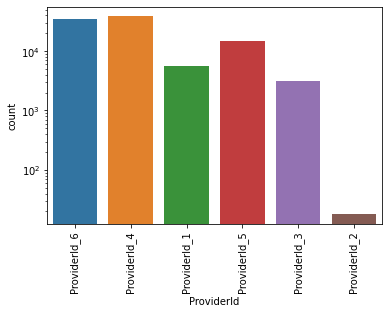

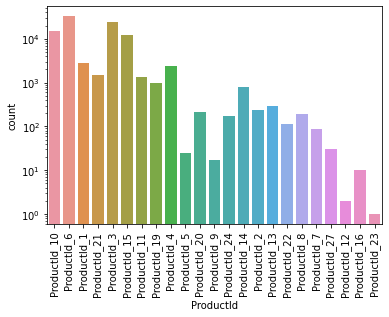

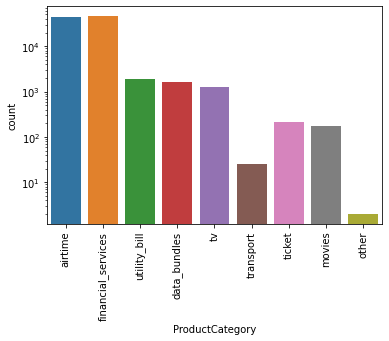

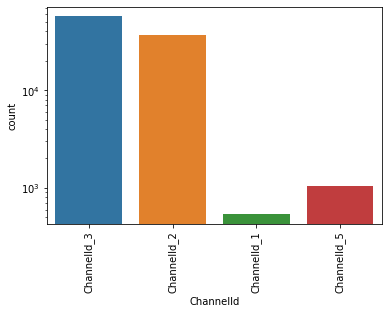

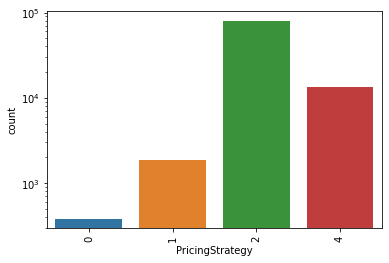

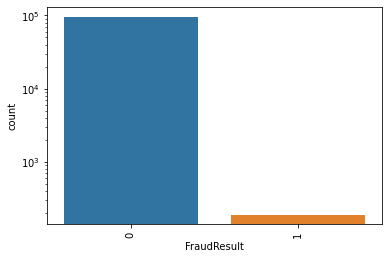

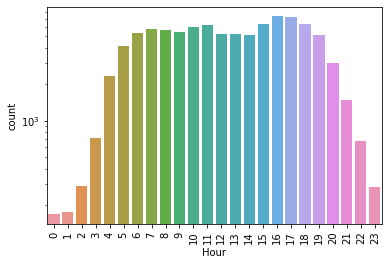

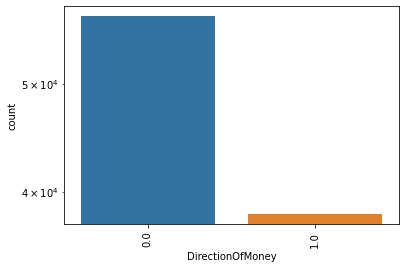

In [11]:
# univariate distributions
for c in data[['ProviderId', 'ProductId','ProductCategory', 'ChannelId','PricingStrategy', 'FraudResult', 'Hour','DirectionOfMoney']].columns:
        plt.figure()
        sns.countplot(data[c])
        plt.xticks(rotation=90)
        plt.yscale('log')


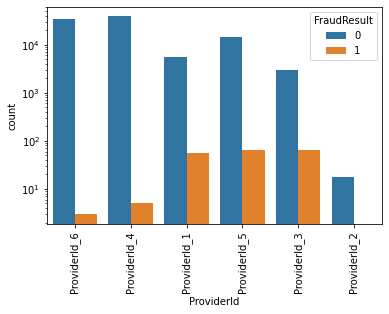

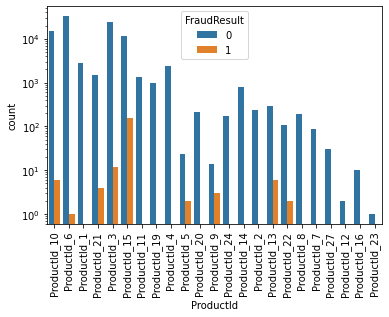

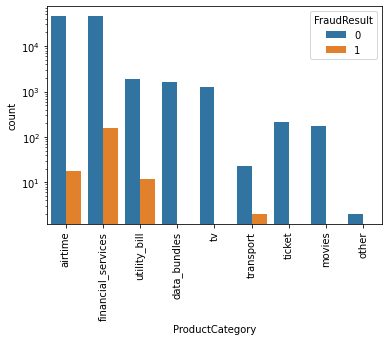

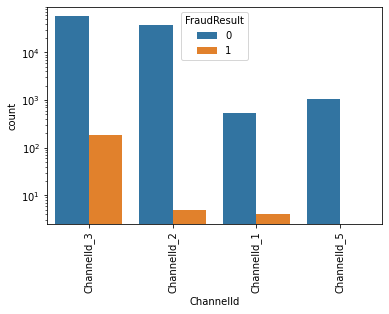

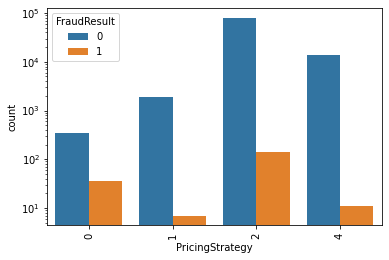

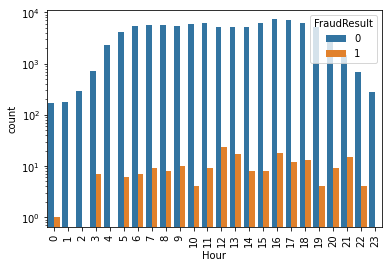

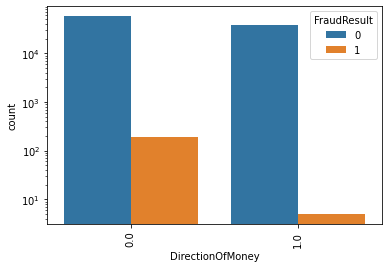

In [12]:
# bivartiate distrobution
for c in data[['ProviderId', 'ProductId','ProductCategory', 'ChannelId','PricingStrategy', 'Hour','DirectionOfMoney']].columns:
        plt.figure()
        #g = sns.FacetGrid(data = data,  col = 'FraudResult')
        sns.countplot(x=c, hue='FraudResult', data = data)
        #g.map(sns.countplot, x = c)
        plt.xticks(rotation=90)
        plt.yscale('log')

#g = sns.FacetGrid(data[['ProviderId', 'ProductId','ProductCategory', 'ChannelId','PricingStrategy', 'FraudResult', 'Hour','DirectionOfMoney', 'FraudResult']], 
#'FraudResult')
#g.map(sns.catplot, 


In [13]:
# creating new column for the log of value (to erase outliers)



In [14]:
plt.hist(df['Valuelog'], bins=25)
plt.yscale('log')

KeyError: 'Valuelog'

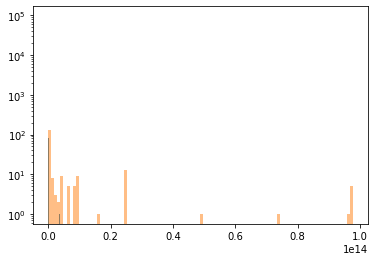

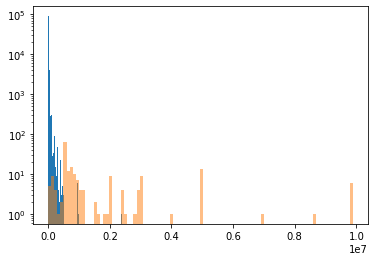

In [ ]:
import matplotlib.pyplot as plt
plt.hist(data.loc[data['FraudResult'] == 0,'Value2'], bins=100)
plt.yscale('log')
plt.hist(data.loc[data['FraudResult'] == 1,'Value2'], bins=100, alpha = 0.5)
plt.yscale('log')
plt.show()

plt.hist(data.loc[data['FraudResult'] == 0,'Value'], bins=100)
plt.yscale('log')
plt.hist(data.loc[data['FraudResult'] == 1,'Value'], bins=100, alpha = 0.5)
plt.yscale('log')
plt.show()



In [ ]:
df.columns

Index(['Value', 'PricingStrategy', 'Hour', 'DirectionOfMoney',
       'ProviderId_ProviderId_1', 'ProviderId_ProviderId_2',
       'ProviderId_ProviderId_3', 'ProviderId_ProviderId_4',
       'ProviderId_ProviderId_5', 'ProviderId_ProviderId_6',
       'ProductId_ProductId_1', 'ProductId_ProductId_10',
       'ProductId_ProductId_11', 'ProductId_ProductId_12',
       'ProductId_ProductId_13', 'ProductId_ProductId_14',
       'ProductId_ProductId_15', 'ProductId_ProductId_16',
       'ProductId_ProductId_19', 'ProductId_ProductId_2',
       'ProductId_ProductId_20', 'ProductId_ProductId_21',
       'ProductId_ProductId_22', 'ProductId_ProductId_23',
       'ProductId_ProductId_24', 'ProductId_ProductId_27',
       'ProductId_ProductId_3', 'ProductId_ProductId_4',
       'ProductId_ProductId_5', 'ProductId_ProductId_6',
       'ProductId_ProductId_7', 'ProductId_ProductId_8',
       'ProductId_ProductId_9', 'ChannelId_ChannelId_1',
       'ChannelId_ChannelId_2', 'ChannelId_ChannelId_3',

In [ ]:
# initialising first very simple basline model, every transaction used for financial services is predicte to be fradulent
#used the great method kat showed us
df.loc[df['ProductCategory_financial_services'] == 1, 'Prediction'] = 1
df.loc[df['ProductCategory_financial_services'] != 1, 'Prediction'] = 0
predictions = df.Prediction
df = df.drop('Prediction', axis=1)

In [ ]:
condition1 = df['ProductCategory_financial_services'] == 1
condition2 = df['DirectionOfMoney'] == 0
condition3 = df['ChannelId_ChannelId_3'] == 1
condition4 = (df['PricingStrategy'] == 0) | (df['PricingStrategy'] == 2)
condition5 = df["ProductId_ProductId_15"] == 1
condition6 = (df['ProviderId_ProviderId_1'] == 1) | (df['ProviderId_ProviderId_3'] == 1)| (df['ProviderId_ProviderId_5'] == 1)
condition7 = df['Value'] >= 200000
predictions = condition1 & condition2 & condition3 & condition4 & condition5 & condition6 & condition7
#printing scores for baseline
print_evaluations(y, predictions)


NameError: name 'print_evaluations' is not defined

Accuracy: 0.8771612552528695
Precision: 0.013142375737152484
Recall: 0.8082901554404145
F1: 0.02586421288236757


In [25]:
#defining X and y
y = data['FraudResult']
X.to_csv("data/X.csv")  
y.to_csv("data/y.csv")  

y.head()

0    0
1    0
2    0
3    0
4    0
Name: FraudResult, dtype: int64

In [ ]:
#splitting data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#used smote algorithm (synthetic oversampling) to oversample fradulent class
# dataframes of synthetic datapoints: smote_data_X, smote_data_Y
smote_algo = SMOTE(random_state=50)
smote_data_X, smote_data_Y = smote_algo.fit_resample(X_train, y_train)
smote_data_X = pd.DataFrame(data=smote_data_X, columns=X_train.columns)
smote_data_Y = pd.DataFrame(data=smote_data_Y, columns=['FraudResult'])

In [ ]:
sum(smote_data_Y.FraudResult)/len(smote_data_Y)
sum()

0.5

/var/folders/wp/ylcd0z3n66jgx_wrcv4p13v80000gn/T/ipykernel_17529/3608611918.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(smote_data_X, smote_data_Y)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Par

Confusion matrix, without normalization
[[31478    26]
 [    7    58]]
Accuracy: 0.9989546707212772
Precision: 0.6904761904761905
Recall: 0.8923076923076924
F1: 0.7785234899328859


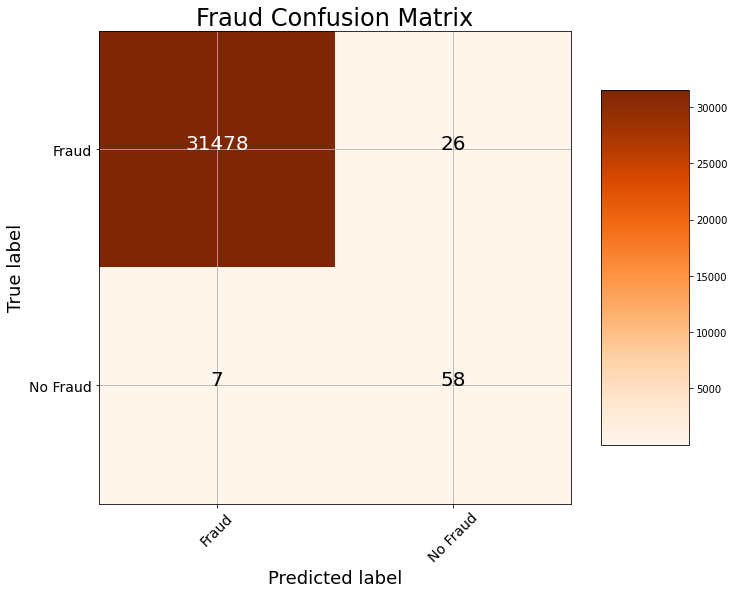

In [ ]:
# random forest on oversampled, synthecized (smote) data
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, 
                               random_state=50, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)
model_rf.fit(smote_data_X, smote_data_Y)
# Training predictions (to demonstrate overfitting)
train_rf_predictions = model_rf.predict(smote_data_X)
train_rf_probs = model_rf.predict_proba(smote_data_X)[:, 1]

# Testing predictions (to determine performance)
test_rf_predictions = model_rf.predict(X_test)
test_rf_probs = model_rf.predict_proba(X_test)[:, 1]

# Confusion matrix
cm = confusion_matrix(y_test, test_rf_predictions)
plot_confusion_matrix(cm, classes = ['Fraud', 'No Fraud'],
                      title = 'Fraud Confusion Matrix')

print_evaluations(y_test, test_rf_predictions)


Confusion matrix, without normalization
[[63930    35]
 [    1 63964]]
Accuracy: 0.9997185961072461
Precision: 0.9994531164549446
Recall: 0.9999843664504026
F1: 0.9997186708761839


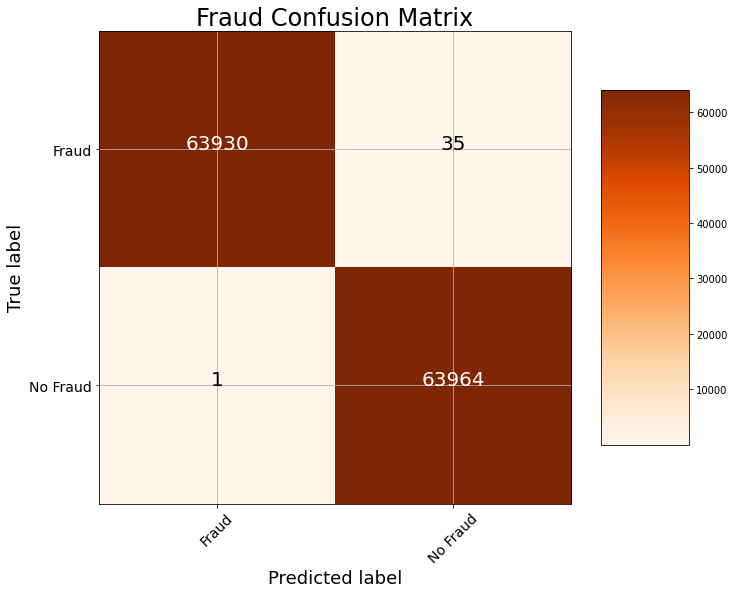

In [ ]:
cm = confusion_matrix(smote_data_Y, train_rf_predictions)
plot_confusion_matrix(cm, classes = ['Fraud', 'No Fraud'],
                      title = 'Fraud Confusion Matrix')
print_evaluations(smote_data_Y, train_rf_predictions)

/Users/kw/neuefische/fraud/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix, without normalization
[[31400   104]
 [    4    61]]
Accuracy: 0.9965789223605436
Precision: 0.3696969696969697
Recall: 0.9384615384615385
F1: 0.5304347826086957


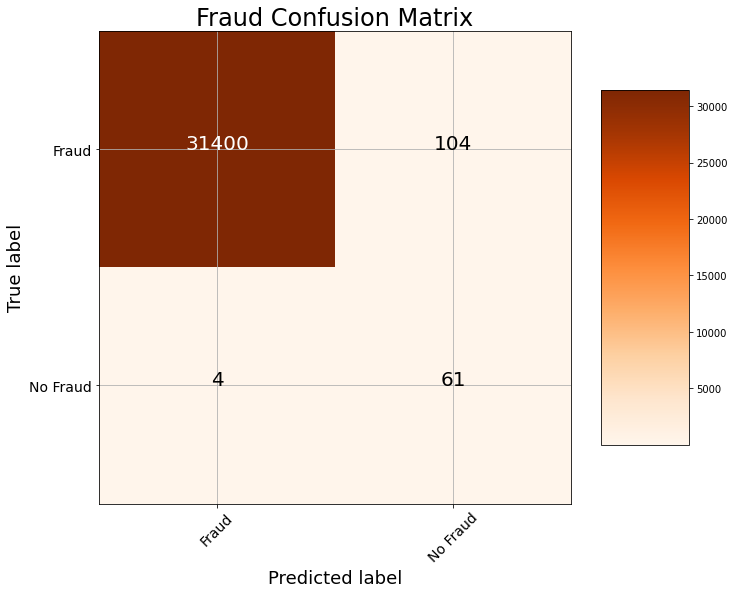

In [ ]:
model_adaboost =  AdaBoostClassifier(random_state = 50)
model_adaboost.fit(smote_data_X, smote_data_Y)

# Training predictions (to demonstrate overfitting)
train_adaboost_predictions = model_adaboost.predict(smote_data_X)
train_adaboost_probs = model_adaboost.predict_proba(smote_data_X)[:, 1]

# Testing predictions (to determine performance)
test_adaboost_predictions = model_adaboost.predict(X_test)
test_adaboost_probs = model_adaboost.predict_proba(X_test)[:, 1]

# Confusion matrix
cm = confusion_matrix(y_test, test_adaboost_predictions)
plot_confusion_matrix(cm, classes = ['Fraud', 'No Fraud'],
                      title = 'Fraud Confusion Matrix')

print_evaluations(y_test, test_adaboost_predictions)



In [ ]:
# used randomundersampler algorithm to undersample non fradulent class
# dataframes for undersampled data: X_res, y_res
rus = RandomUnderSampler(random_state=50)
X_res, y_res = rus.fit_resample(X_train, y_train)